In [127]:
%matplotlib inline

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Read the file

In [182]:
df = pd.read_csv('Churn_Modelling.csv')
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### See the data

In [183]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Check if there are any missing values

In [184]:
df.isnull().sum(axis=0)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Check the box plots

<AxesSubplot:>

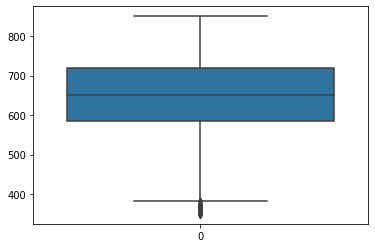

In [185]:
sns.boxplot(data=df.loc[:, 'CreditScore'])

<AxesSubplot:>

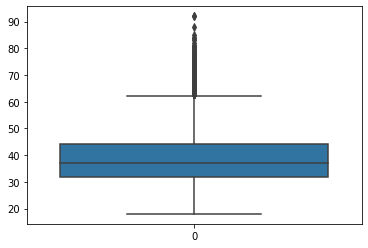

In [186]:
sns.boxplot(data=df.loc[:,'Age'])

<AxesSubplot:>

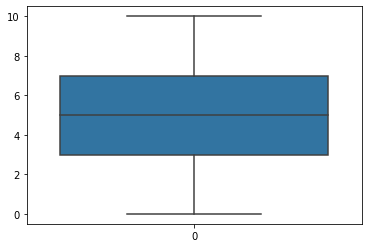

In [187]:
sns.boxplot(data=df.loc[:, 'Tenure'])

<AxesSubplot:>

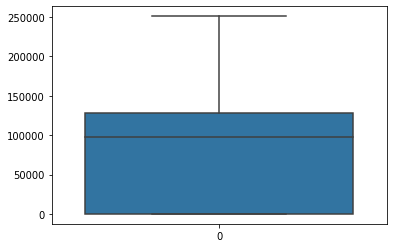

In [188]:
sns.boxplot(data=df.loc[:,'Balance'])

NumOfProducts can be considered for outlier removal

<AxesSubplot:>

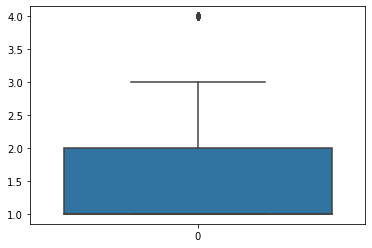

In [189]:
sns.boxplot(data=df.loc[:,'NumOfProducts'])

<AxesSubplot:>

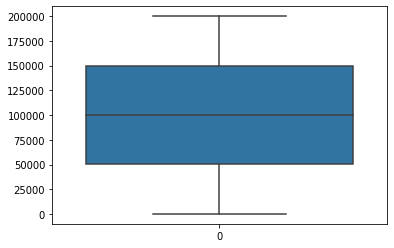

In [190]:
sns.boxplot(data=df.loc[:,'EstimatedSalary'])

In [191]:
#sns.pairplot(df)
#plt.show()

### One hot encoding, scaling etc.

In [192]:
ohdf = df.drop(columns=['Surname', 'CustomerId'])
ohdf = pd.get_dummies(ohdf, columns=['Gender', 'Geography'], dummy_na=True)
ohdf.describe()
X, y = ohdf[ohdf.columns[:-1]], ohdf[df.columns[-1]]
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

0 RowNumber
1 CreditScore
2 Age
3 Tenure
4 Balance
5 NumOfProducts
6 HasCrCard
7 IsActiveMember
8 EstimatedSalary
9 Exited
10 Gender_Female
11 Gender_Male
12 Gender_nan
13 Geography_France
14 Geography_Germany
15 Geography_Spain
16 Geography_nan


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Gender_nan,Geography_France,Geography_Germany,Geography_Spain,Geography_nan
0,-1.731878,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165,1.095988,-1.095988,0.0,0.997204,-0.578736,-0.573809
1,-1.731531,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775,1.095988,-1.095988,0.0,-1.002804,-0.578736,1.742740
2,-1.731185,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165,1.095988,-1.095988,0.0,0.997204,-0.578736,-0.573809
3,-1.730838,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775,1.095988,-1.095988,0.0,0.997204,-0.578736,-0.573809
4,-1.730492,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775,1.095988,-1.095988,0.0,-1.002804,-0.578736,1.742740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775,-0.912419,0.912419,0.0,0.997204,-0.578736,-0.573809
9996,1.730838,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775,-0.912419,0.912419,0.0,0.997204,-0.578736,-0.573809
9997,1.731185,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165,1.095988,-1.095988,0.0,0.997204,-0.578736,-0.573809
9998,1.731531,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165,-0.912419,0.912419,0.0,-1.002804,1.727904,-0.573809


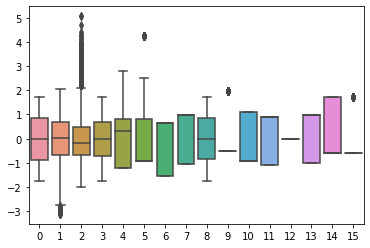

In [193]:
sns.boxplot(data=scaled_X)
for i in range(len(ohdf.columns)):
    print(i, ohdf.columns[i])
scaled_X = pd.DataFrame({ohdf.columns[i+1]: scaled_X[:,i].T for i in range(len(ohdf.columns) - 1)})
scaled_X

In [194]:
X.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Gender_nan,Geography_France,Geography_Germany,Geography_Spain
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.454300,0.545700,0.0,0.501400,0.250900,0.247700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.497932,0.0,0.500023,0.433553,0.431698
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
